Unleash the power of Twitter sentiment analysis using Python! In this comprehensive project, dive into natural language processing (NLP) and machine learning to extract insights from tweets. Explore techniques to preprocess text data, build sentiment classification models, and evaluate their performance.

In this project, we are going to analyze and classify tweets from the dataset using a classifying model and visualize the frequent words using plot graphs.

## Dataset Information

The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets.

Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist, your objective is to predict the labels on the test dataset.


For training the models, we provide a labelled dataset of 31,962 tweets. The dataset is provided in the form of a csv file with each line storing a tweet id, its label and the tweet.


In this analysis we’re going to process text based data, machines can’t understand text-oriented data so we’ll convert the text to vectors and proceed further.


## Import Modules

* <b>pandas</b> - used to perform data manipulation and analysis


* <b>numpy</b> - used to perform a wide variety of mathematical operations on arrays


* <b>matplotlib</b> - used for data visualization and graphical plotting


* <b>seaborn</b> - built on top of matplotlib with similar functionalities


* <b>re</b> – used as a regular expression to find particular patterns and process it


* <b>string</b> – used to obtain information in the string and manipulate the string overall


* <b>nltk</b> –  a natural language processing toolkit module associated in anaconda


* <b>warnings</b> - to manipulate warnings details


* <b>%matplotlib</b> - to enable the inline plotting

<b>filterwarnings('ignore')</b> is to ignore the warnings thrown by the modules (gives clean results)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

## Loading the Dataset

In [3]:
df = pd.read_csv('train_E6oV3lV.csv')
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


* <b>pd.read_csv()</b> - loads the csv(comma seperated value) data into a dataframe


* <b>df.head()</b> - displays the 5 first rows from the dataframe


* Zero (0) indicates it’s a positive sentiment


* One (1) indicates it’s a negative sentiment (racist/sexist)

In [4]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


* The 'tweet' column is an object which will be processed as a string passing the tweets listed above in the pre-processing step

## Preprocessing the Dataset

In [7]:
# removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

* This function works to remove certain patterns in the text for preprocessing

In [8]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [9]:
# remove twitter handles (@user)
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")

In [10]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


* <b>"@[\w]*"</b> is the twitter handle pattern to remove in the text for preprocessing

In [11]:
# remove special characters, numbers and punctuations
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


* <b>[^a-zA-Z#]</b> is the parameter to remove all special characters, numbers and punctuations

In [12]:
# remove short words
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation


* Process to remove shorter words less than 3 characters long

In [13]:
# individual words considered as tokens
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: clean_tweet, dtype: object

* Individual words separated as tokens to facilitate further processing as strings

In [16]:
# stem the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, cau, they, offer, wheel...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: clean_tweet, dtype: object

* <b>Stemmer.stem()</b> converts certain words into its simpler version

In [17]:
# combine words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
df['clean_tweet'] = tokenized_tweet
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit cau they offer wheelchair v...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguid societi #motiv


* Combining the tokenized words into a sentence

Now we can directly go to the exploratory data analysis.

## Exploratory Data Analysis

In Exploratory Data Analysis (EDA), we will visualize the data with different kinds of plots for inference. It is helpful to find some patterns (or) relations within the data.

In [ ]:
!pip install wordcloud

* Necessary installation process to use the wordcloud

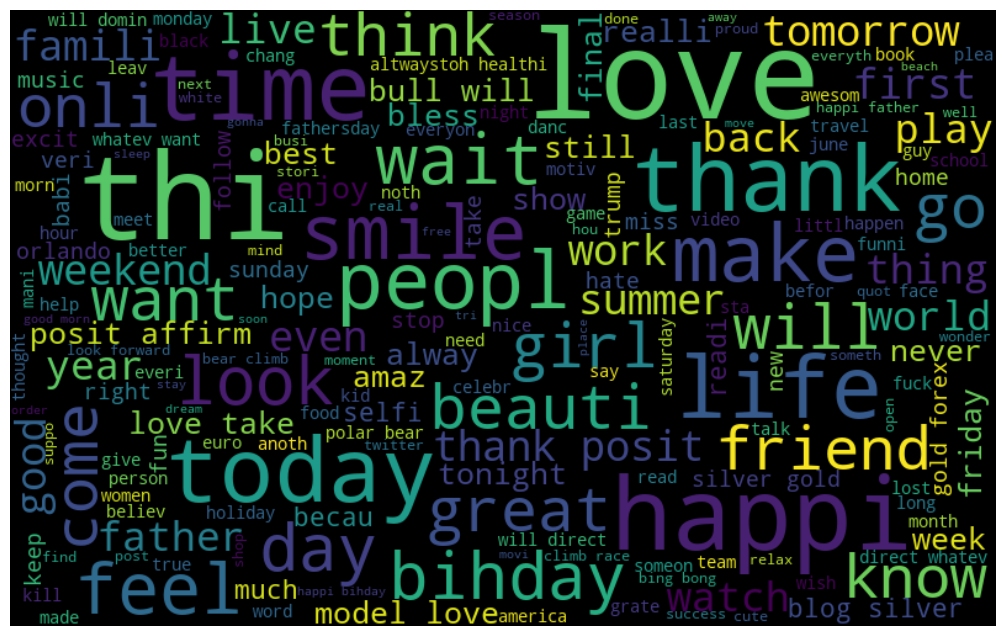

In [21]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

* Filtering all frequent words from the data to plot graph using the word cloud


* The plot displaying many positive words and a few negative words 

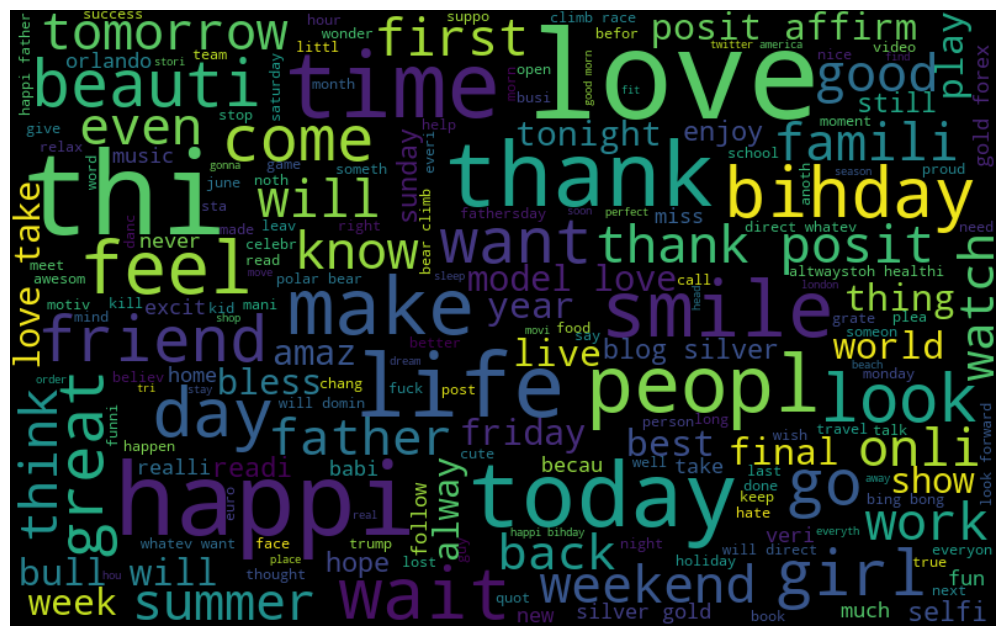

In [22]:
# frequent words visualization for +ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

* Filtering more frequent positive words adding a new parameter <b>[df['label']==0]</b> indicating positive sentiments


* Comparing with the previous plot graph, there’s more positive words

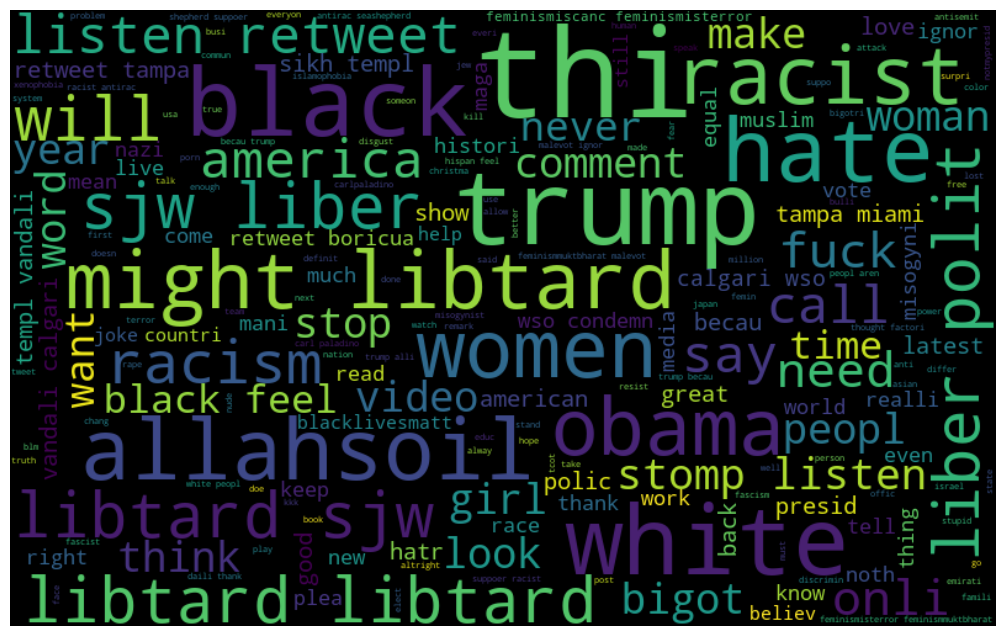

In [23]:
# frequent words visualization for -ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

* For the negative sentiment it’s exactly the same code but changing the value of label to one (1), filtering racist/sexist words used

In [24]:
# extract the hashtag
def hashtag_extract(tweets):
    hashtags = []
    # loop words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags

* Extraction of all racist and non-racist hashtag content in the tweets, returning a list of hashtags

In [25]:
# extract hashtags from non-racist/sexist tweets
ht_positive = hashtag_extract(df['clean_tweet'][df['label']==0])

* Extraction of hashtags from positive tweets

In [26]:
# extract hashtags from racist/sexist tweets
ht_negative = hashtag_extract(df['clean_tweet'][df['label']==1])

* Extraction of hashtags from negative tweets

In [27]:
ht_positive[:5]

[['run'], ['lyft', 'disapoint', 'getthank'], [], ['model'], ['motiv']]

* Viewing the list of the extracted positive hashtags, in this example we are listing five for a simple view

In [28]:
# unnest list
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

* Filtering and cleaning the words in the sentence for a better visualization and processing

In [29]:
ht_positive[:5]

['run', 'lyft', 'disapoint', 'getthank', 'model']

* Listing the words to view the results, now it can be processed more efficiently

In [30]:
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                  'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375


* Conversion of the dictionary into a dataframe to list positive hashtags with count

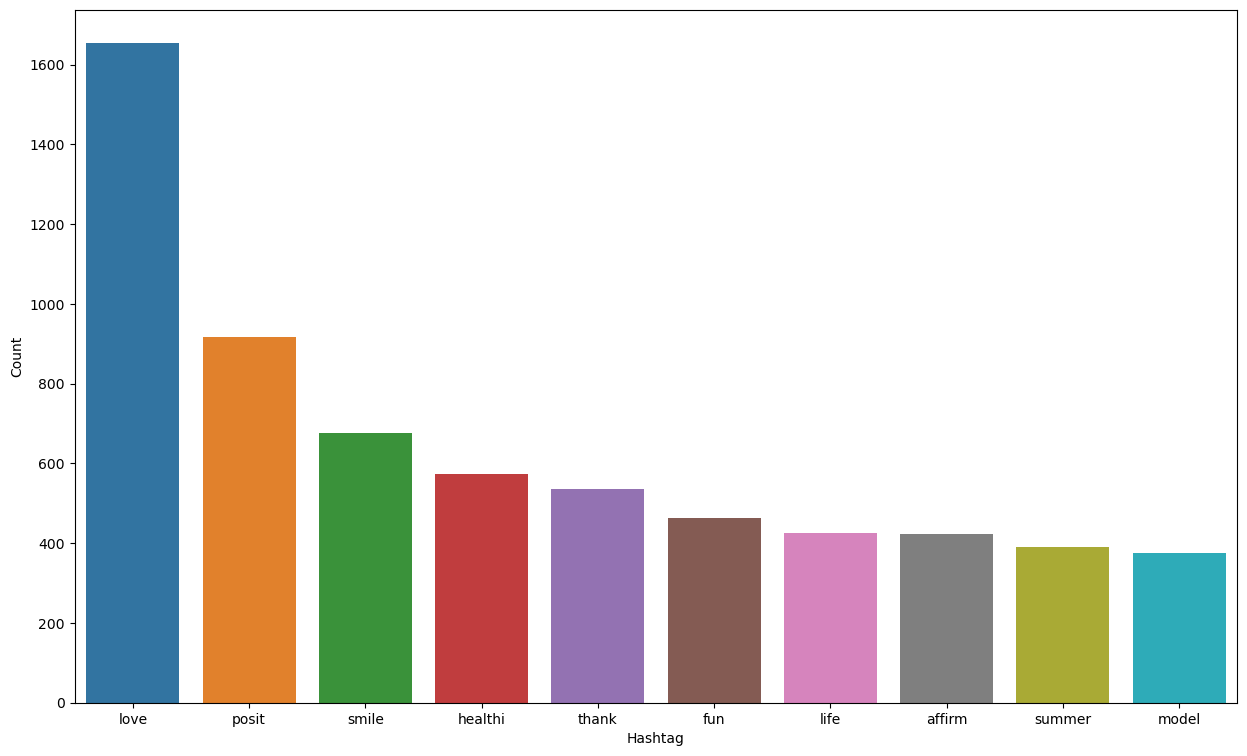

In [31]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

* Visualization through a bar graph for top ten positive hashtags with high frequency

In [32]:
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                  'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5


* Conversion of the dictionary into a dataframe to list negative hashtags with count

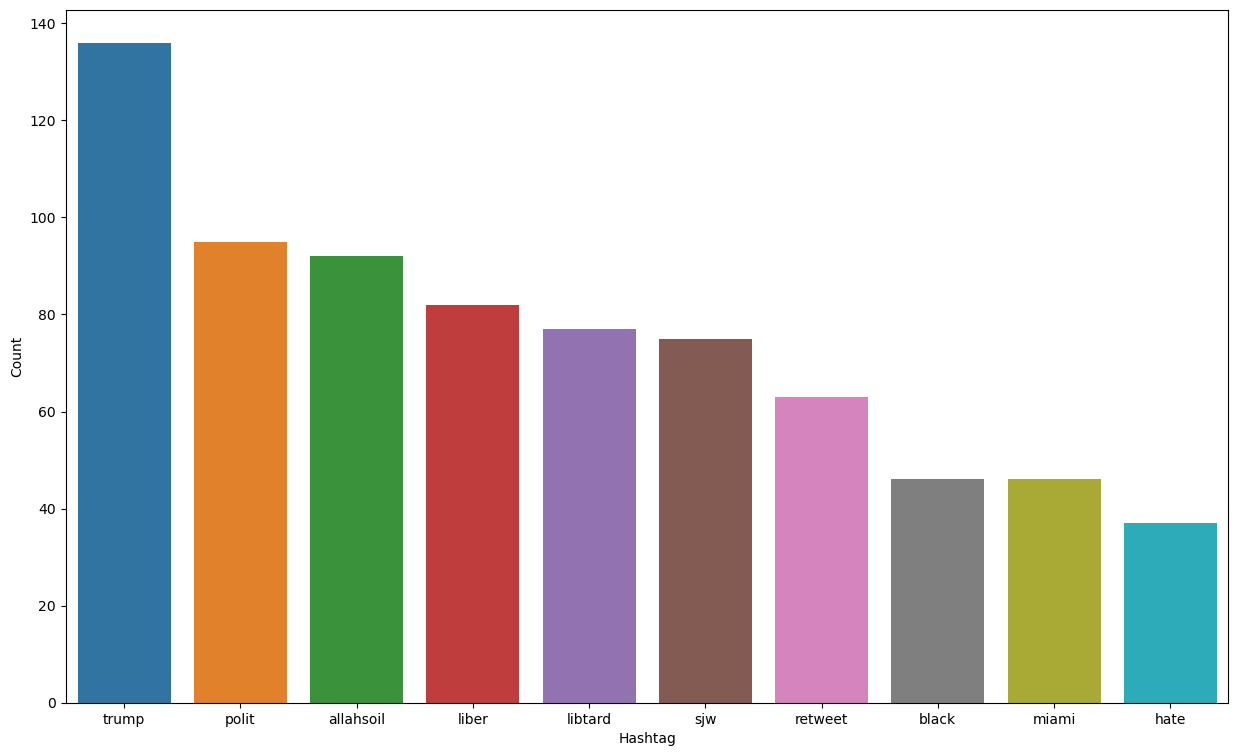

In [33]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

* Visualization through a bar graph for top ten negative hashtags with high frequency

## Input Split

The Input Split is a pre-process step for feature selection or feature extraction of the words in order to convert them into vectors for the machine to understand.

In [34]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['clean_tweet'])

* Extraction of the data into vectors for training and testing

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['label'], random_state=42, test_size=0.25)

* Splitting the data for training and testing with test size of 25%

## Model Training

For this project the Logistic Regression model is used, other models may be used by your preference.

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [37]:
# training
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [38]:
# testing
pred = model.predict(x_test)
f1_score(y_test, pred)

0.49282296650717705

In [39]:
accuracy_score(y_test,pred)

0.9469403078463271

* <b>f1_score()</b> and <b>accuracy_score()</b> gives the performance metrics of the model for the test data

In [41]:
# use probability to get output
pred_prob = model.predict_proba(x_test)
pred = pred_prob[:, 1] >= 0.3
pred = pred.astype(np.int_)

f1_score(y_test, pred)

0.556201550387597

* Predict probability feature to receive a output in probability value


* <b>pred_prob[: , 1] >= 0.3</b> - if result is greater than 30 percent it will assign 1, else it will assign 0


* <b>pred.astype(np.int_)</b> - assign the value to an integer

In [42]:
accuracy_score(y_test,pred)

0.9426855212113627

* The scores have been improved by using the probability values with threshold

## Final Thoughts

* Machines can’t process text-based data, so we have to convert to numerical form in order to process the data


* Simplifying and filtering text can achieve cleaner data to process, giving better results


* You may use different machine learning models of your preference for comparison